In [1]:
import data_setup
import torchvision
import torch
from torchvision import transforms

device = 'cuda' if torch.cuda.is_available else 'cpu'

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
manual_tranforms = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor(), normalize])

train_dir = "./datasets/train"
test_dir = "./datasets/test"

train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir, test_dir=test_dir, transform=manual_tranforms, batch_size=32)

In [2]:
#del model
torch.cuda.empty_cache()

In [3]:
device, train_dataloader, test_dataloader, class_names

('cuda',
 ['PVP', 'non-PVP'])

In [12]:
weights = torchvision.models.GoogLeNet_Weights.DEFAULT
model = torchvision.models.googlenet(weights=weights).to(device)
model

Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /home/abir/.cache/torch/hub/checkpoints/googlenet-1378be20.pth
100%|██████████| 49.7M/49.7M [00:47<00:00, 1.10MB/s]


GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [13]:
from torchinfo import summary

summary(model=model, input_size=(1, 3, 224, 224), col_names=['input_size', 'output_size', 'num_params', 'trainable'], col_width=20, row_settings=['var_names'])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
GoogLeNet (GoogLeNet)                    [1, 3, 224, 224]     [1, 1000]            --                   True
├─BasicConv2d (conv1)                    [1, 3, 224, 224]     [1, 64, 112, 112]    --                   True
│    └─Conv2d (conv)                     [1, 3, 224, 224]     [1, 64, 112, 112]    9,408                True
│    └─BatchNorm2d (bn)                  [1, 64, 112, 112]    [1, 64, 112, 112]    128                  True
├─MaxPool2d (maxpool1)                   [1, 64, 112, 112]    [1, 64, 56, 56]      --                   --
├─BasicConv2d (conv2)                    [1, 64, 56, 56]      [1, 64, 56, 56]      --                   True
│    └─Conv2d (conv)                     [1, 64, 56, 56]      [1, 64, 56, 56]      4,096                True
│    └─BatchNorm2d (bn)                  [1, 64, 56, 56]      [1, 64, 56, 56]      128                  True
├─BasicConv2d (c

In [6]:
#for param in model.features.parameters():
#    param.requires_grad = True

In [6]:
summary(model=model, input_size=(1, 3, 224, 224), col_names=['input_size', 'output_size', 'num_params', 'trainable'], col_width=20, row_settings=['var_names'])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
GoogLeNet (GoogLeNet)                    [1, 3, 224, 224]     [1, 1000]            6,379,984            True
├─BasicConv2d (conv1)                    [1, 3, 224, 224]     [1, 64, 112, 112]    --                   True
│    └─Conv2d (conv)                     [1, 3, 224, 224]     [1, 64, 112, 112]    9,408                True
│    └─BatchNorm2d (bn)                  [1, 64, 112, 112]    [1, 64, 112, 112]    128                  True
├─MaxPool2d (maxpool1)                   [1, 64, 112, 112]    [1, 64, 56, 56]      --                   --
├─BasicConv2d (conv2)                    [1, 64, 56, 56]      [1, 64, 56, 56]      --                   True
│    └─Conv2d (conv)                     [1, 64, 56, 56]      [1, 64, 56, 56]      4,096                True
│    └─BatchNorm2d (bn)                  [1, 64, 56, 56]      [1, 64, 56, 56]      128                  True
├─BasicConv2d (c

In [14]:
model.fc

Linear(in_features=1024, out_features=1000, bias=True)

In [15]:
from torch import nn

model.fc = nn.Linear(in_features=1024, out_features=len(class_names), bias=True).to(device)



In [16]:
summary(model=model, input_size=(1, 3, 224, 224), col_names=['input_size', 'output_size', 'num_params', 'trainable'], col_width=20, row_settings=['var_names'])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
GoogLeNet (GoogLeNet)                    [1, 3, 224, 224]     [1, 2]               --                   True
├─BasicConv2d (conv1)                    [1, 3, 224, 224]     [1, 64, 112, 112]    --                   True
│    └─Conv2d (conv)                     [1, 3, 224, 224]     [1, 64, 112, 112]    9,408                True
│    └─BatchNorm2d (bn)                  [1, 64, 112, 112]    [1, 64, 112, 112]    128                  True
├─MaxPool2d (maxpool1)                   [1, 64, 112, 112]    [1, 64, 56, 56]      --                   --
├─BasicConv2d (conv2)                    [1, 64, 56, 56]      [1, 64, 56, 56]      --                   True
│    └─Conv2d (conv)                     [1, 64, 56, 56]      [1, 64, 56, 56]      4,096                True
│    └─BatchNorm2d (bn)                  [1, 64, 56, 56]      [1, 64, 56, 56]      128                  True
├─BasicConv2d (c

In [11]:
model.fc

Linear(in_features=1024, out_features=2, bias=True)

In [25]:
import engine

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

results = engine.train(model=model, train_dataloader=train_dataloader, test_dataloader=test_dataloader, optimizer=optimizer, loss_fn=loss_fn, epochs=25, device=device)

  4%|▍         | 1/25 [07:44<3:05:57, 464.88s/it]

Epoch: 1 | train_loss: 0.4728 | train_acc: 0.7769 | test_loss: 0.4132 | test_acc: 0.8146


  8%|▊         | 2/25 [11:18<2:01:34, 317.14s/it]

Epoch: 2 | train_loss: 0.3380 | train_acc: 0.8555 | test_loss: 0.3250 | test_acc: 0.8638


 12%|█▏        | 3/25 [14:52<1:39:01, 270.06s/it]

Epoch: 3 | train_loss: 0.2436 | train_acc: 0.9014 | test_loss: 0.3123 | test_acc: 0.8736


 16%|█▌        | 4/25 [18:26<1:26:46, 247.95s/it]

Epoch: 4 | train_loss: 0.1641 | train_acc: 0.9357 | test_loss: 0.4060 | test_acc: 0.8448


 20%|██        | 5/25 [22:00<1:18:31, 235.56s/it]

Epoch: 5 | train_loss: 0.1136 | train_acc: 0.9567 | test_loss: 0.4090 | test_acc: 0.8615


 24%|██▍       | 6/25 [25:33<1:12:11, 227.99s/it]

Epoch: 6 | train_loss: 0.0847 | train_acc: 0.9681 | test_loss: 0.4133 | test_acc: 0.8797


 28%|██▊       | 7/25 [29:07<1:07:00, 223.34s/it]

Epoch: 7 | train_loss: 0.0742 | train_acc: 0.9726 | test_loss: 0.4402 | test_acc: 0.8729


 32%|███▏      | 8/25 [32:41<1:02:27, 220.42s/it]

Epoch: 8 | train_loss: 0.0580 | train_acc: 0.9784 | test_loss: 0.5223 | test_acc: 0.8692


 36%|███▌      | 9/25 [36:15<58:15, 218.47s/it]  

Epoch: 9 | train_loss: 0.0574 | train_acc: 0.9785 | test_loss: 0.5392 | test_acc: 0.8820


 40%|████      | 10/25 [39:49<54:16, 217.10s/it]

Epoch: 10 | train_loss: 0.0489 | train_acc: 0.9821 | test_loss: 0.5060 | test_acc: 0.8749


 44%|████▍     | 11/25 [43:23<50:26, 216.15s/it]

Epoch: 11 | train_loss: 0.0459 | train_acc: 0.9833 | test_loss: 0.5255 | test_acc: 0.8767


 48%|████▊     | 12/25 [46:57<46:40, 215.41s/it]

Epoch: 12 | train_loss: 0.0424 | train_acc: 0.9850 | test_loss: 0.4646 | test_acc: 0.8833


 52%|█████▏    | 13/25 [50:31<42:59, 214.97s/it]

Epoch: 13 | train_loss: 0.0392 | train_acc: 0.9855 | test_loss: 0.6255 | test_acc: 0.8778


 56%|█████▌    | 14/25 [54:05<39:21, 214.71s/it]

Epoch: 14 | train_loss: 0.0352 | train_acc: 0.9879 | test_loss: 0.6491 | test_acc: 0.8703


 60%|██████    | 15/25 [57:39<35:46, 214.61s/it]

Epoch: 15 | train_loss: 0.0381 | train_acc: 0.9866 | test_loss: 0.5663 | test_acc: 0.8795


 64%|██████▍   | 16/25 [1:01:13<32:09, 214.41s/it]

Epoch: 16 | train_loss: 0.0319 | train_acc: 0.9889 | test_loss: 0.5376 | test_acc: 0.8864


 68%|██████▊   | 17/25 [1:04:47<28:33, 214.21s/it]

Epoch: 17 | train_loss: 0.0329 | train_acc: 0.9883 | test_loss: 0.5834 | test_acc: 0.8820


 72%|███████▏  | 18/25 [1:08:21<24:58, 214.02s/it]

Epoch: 18 | train_loss: 0.0292 | train_acc: 0.9898 | test_loss: 0.6814 | test_acc: 0.8798


 76%|███████▌  | 19/25 [1:11:59<21:31, 215.28s/it]

Epoch: 19 | train_loss: 0.0296 | train_acc: 0.9895 | test_loss: 0.7620 | test_acc: 0.8749


 80%|████████  | 20/25 [1:15:38<18:01, 216.31s/it]

Epoch: 20 | train_loss: 0.0256 | train_acc: 0.9914 | test_loss: 0.6127 | test_acc: 0.8818


 84%|████████▍ | 21/25 [1:19:17<14:28, 217.14s/it]

Epoch: 21 | train_loss: 0.0257 | train_acc: 0.9910 | test_loss: 0.6251 | test_acc: 0.8884


 88%|████████▊ | 22/25 [1:22:53<10:51, 217.03s/it]

Epoch: 22 | train_loss: 0.0243 | train_acc: 0.9914 | test_loss: 0.5983 | test_acc: 0.8873


 92%|█████████▏| 23/25 [1:26:22<07:09, 214.63s/it]

Epoch: 23 | train_loss: 0.0252 | train_acc: 0.9909 | test_loss: 0.8973 | test_acc: 0.8309


 96%|█████████▌| 24/25 [1:29:56<03:34, 214.39s/it]

Epoch: 24 | train_loss: 0.0241 | train_acc: 0.9916 | test_loss: 0.6095 | test_acc: 0.8775


100%|██████████| 25/25 [1:33:32<00:00, 224.48s/it]

Epoch: 25 | train_loss: 0.0244 | train_acc: 0.9920 | test_loss: 0.5883 | test_acc: 0.8859


In [26]:
def plot_loss_curves(results):
    loss = results["train_loss"]
    test_loss = results["test_loss"]

    acc = results["train_acc"]
    test_acc = results["test_acc"]

    epochs = range(len(results["train_loss"]))

    plt.figure(figsize=(15, 7))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, label="train_accuracy")
    plt.plot(epochs, test_acc, label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

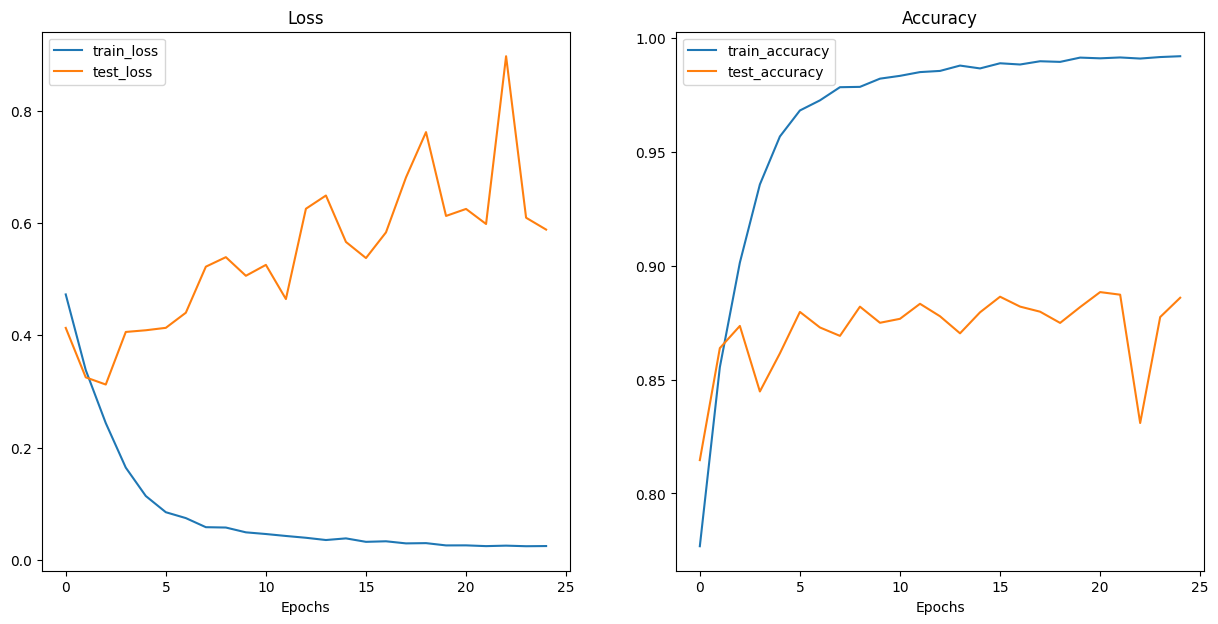

In [27]:
import matplotlib.pyplot as plt

plot_loss_curves(results)

In [29]:
import utils

utils.save_model(model, "./", "googlenet_89.pth")

[INFO] Saving model to: googlenet_89.pth
